# Parametric Spline Representation of Signature

In [1]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

## Displaying Image of your name and gathering points

In [6]:
%matplotlib qt
# Display nickname image
f = plt.imread('Harsimran.jpg')
plt.figure(figsize=(9,5)); plt.imshow(f);

segment1 = plt.ginput(n=0, timeout=0)
segment2 = plt.ginput(n=0, timeout=0)
segment3 = plt.ginput(n=0, timeout=0)
plt.close()

## Hardcode interpolation points

In [ ]:
x1 = [point[0] for point in segment1]
y1 = [point[1] for point in segment1]

x2 = [point[0] for point in segment2]
y2 = [point[1] for point in segment2]

x3 = [point[0] for point in segment3]
y3 = [point[1] for point in segment3]


## `ParametricSpline`

In [ ]:
def ParametricSpline(Sx,Sy):
    
    #create array of distances
    distances = np.sqrt((np.diff(Sx))**2 + (np.diff(Sy))**2)

    # create distance based values for t
    t = np.concatenate(([0], np.cumsum(distances)))

    x_cs = make_interp_spline(t, Sx, k=3)
    y_cs = make_interp_spline(t, Sy, k=3)

    return x_cs, y_cs, t

## Find parametric splines for each segment

In [ ]:

x_cs1, y_cs1, t1 = ParametricSpline(x1, y1)
x_cs2, y_cs2, t2 = ParametricSpline(x2, y2)
x_cs3, y_cs3, t3 = ParametricSpline(x3, y3)

## Plot the segments

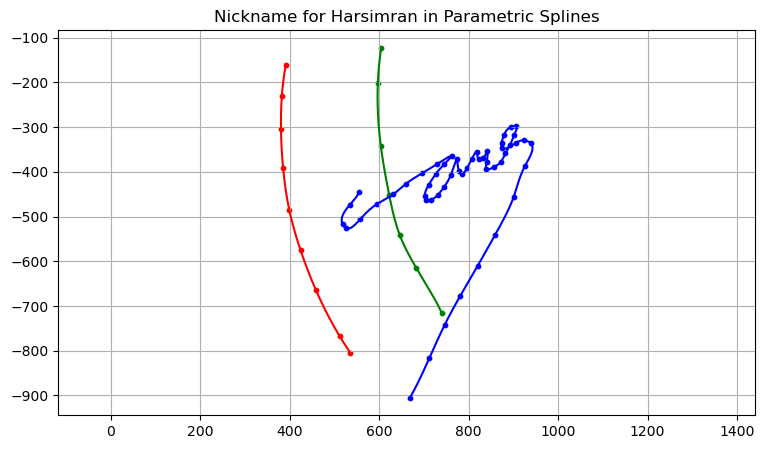

In [ ]:

%matplotlib inline
t_fine1 = np.linspace(t1[0], t1[-1], 1000)
t_fine2 = np.linspace(t2[0], t2[-1], 1000)
t_fine3 = np.linspace(t3[0], t3[-1], 1000)

x_smooth1 = x_cs1(t_fine1)
y_smooth1 = -y_cs1(t_fine1) # have to flip all the y values since ginput uses top left for 0,0 vs the graph using bottom left

x_smooth2 = x_cs2(t_fine2)
y_smooth2 = -y_cs2(t_fine2)

x_smooth3 = x_cs3(t_fine3)
y_smooth3 = -y_cs3(t_fine3)

plt.figure(figsize=(9, 5))

plt.plot(x_smooth1, y_smooth1, color="red")
plt.plot(x_smooth2, y_smooth2, color="green")
plt.plot(x_smooth3, y_smooth3, color="blue")

# have to use -np.array() to flip the coords as described in previous comment
plt.scatter(x1, -np.array(y1), color="red", marker="o", s=10)
plt.scatter(x2, -np.array(y2), color="green", marker="o", s=10)
plt.scatter(x3, -np.array(y3), color="blue", marker="o", s=10)

plt.axis("equal")
plt.grid(True)
plt.title("Nickname for Harsimran in Parametric Splines")

plt.show()